In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype


import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set(style="darkgrid")

#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import string
import warnings
warnings.filterwarnings('ignore')

In [2]:
PATH = "../../../data/house_pricing/"

In [3]:
df_train=pd.read_csv(f'{PATH}train.csv')#, index_col='Id')
df_test=pd.read_csv(f'{PATH}test.csv')#, index_col='Id')

In [4]:
print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['SalePrice'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

Number of Training Examples = 1460
Number of Test Examples = 1459

Training X Shape = (1460, 81)
Training y Shape = 1460

Test X Shape = (1459, 80)
Test y Shape = 1459

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 

In [5]:
print(df_train.info())
df_train.sample(3)
print(df_test.info())
df_test.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
212,1673,60,RL,96.0,13262,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
841,2302,20,RL,70.0,9926,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
1256,2717,60,FV,114.0,8314,Pave,Pave,IR1,Lvl,AllPub,...,110,0,NaN,GdPrv,NaN,0,11,2006,WD,Normal


# Dealing with Outliers

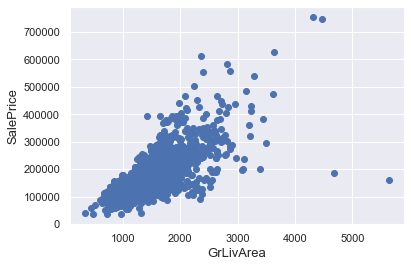

In [6]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### -> To delete outliers

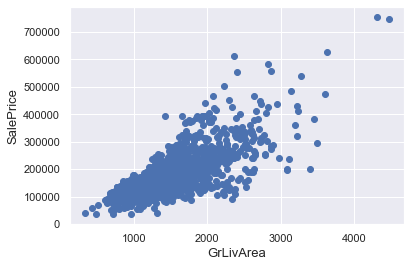

In [7]:
#Deleting outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [8]:
#Correlations with Target value

# Features engineering

In [9]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(df_train.shape))
print("The test data size before dropping Id feature is : {} ".format(df_test.shape))

#Save the 'Id' column
train_ID = df_train['Id']
test_ID = df_test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(df_train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(df_test.shape))


The train data size before dropping Id feature is : (1458, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1458, 80) 
The test data size after dropping Id feature is : (1459, 79) 


# Dealing with Missing Values

[]

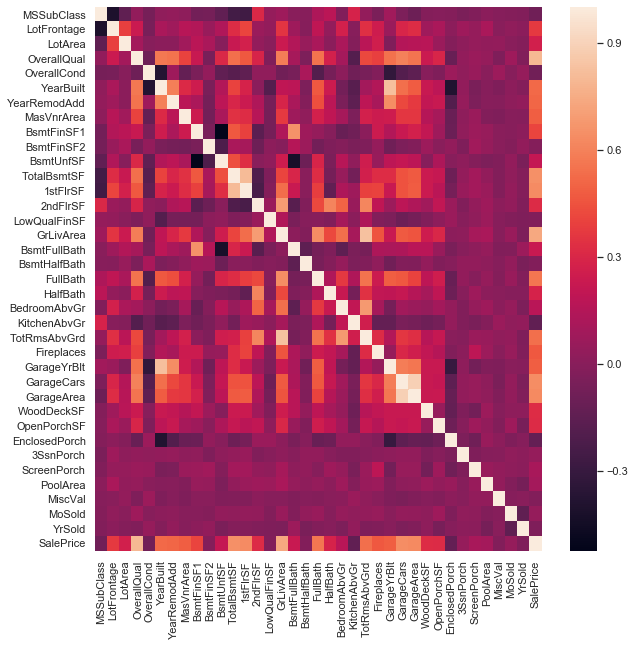

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_train.corr())
plt.plot()

In [11]:
"""
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))

sns.heatmap(df_train.corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
sns.heatmap(df_test.corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

for i in range(2):    
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].tick_params(axis='y', labelsize=14)
    
axs[0].set_title('Training Set Correlations', size=15)
axs[1].set_title('Test Set Correlations', size=15)

plt.show()
"""

"\nfig, axs = plt.subplots(nrows=2, figsize=(20, 20))\n\nsns.heatmap(df_train.corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})\nsns.heatmap(df_test.corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})\n\nfor i in range(2):    \n    axs[i].tick_params(axis='x', labelsize=14)\n    axs[i].tick_params(axis='y', labelsize=14)\n    \naxs[0].set_title('Training Set Correlations', size=15)\naxs[1].set_title('Test Set Correlations', size=15)\n\nplt.show()\n"

In [12]:
df_corr=df_train.corr().sort_values(kind="quicksort", ascending=False, by='SalePrice').abs()
df_corr.drop(axis=1, columns=df_corr.columns.drop('SalePrice'), inplace=True)
df_corr

,SalePrice
SalePrice,1.000000
OverallQual,0.795774
GrLivArea,0.734968
TotalBsmtSF,0.651153
GarageCars,0.641047
1stFlrSF,0.631530
GarageArea,0.629217
FullBath,0.562165
TotRmsAbvGrd,0.537769
YearBuilt,0.523608


In [13]:
# df_train['Alley'].isnull().sum() = show number of NaN rows in 'Alley' column

In [14]:
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set on axis 0
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

df_all = concat_df(df_train, df_test)

df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set' 

dfs = [df_train, df_test]

df_all.shape

(2917, 80)

In [15]:
#remember where to divide train and test
ntrain = df_train.shape[0]
ntest = df_test.shape[0]

In [16]:
#Dividing Target column
y_train = df_train.SalePrice.values
df_all.drop(['SalePrice'], axis=1, inplace=True)

In [17]:
def display_missing(df):
    for col in df.columns:
        print(col, df[col].isnull().sum())
    print('\n')
    
for df in dfs:
    print(format(df.name))
    display_missing(df)
    
    
    
#Check remaining missing values if any 
def display_only_missing(df):
    all_data_na = (df.isnull().sum() / len(df)) * 100
    all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
    print(missing_data.head())

Training Set
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1367
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 8
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1452
Fence 1177
MiscFeature 1404
MiscVal 0
MoSold

In [18]:
"""### Dealing with missing values
to improve in future - may be not median of overall but 
Missing values in 'LotFrontage' feature are filled with the median LotFrontage, but using the median age of the whole data set is not a good choice. Median age of a group is much better because the new values would be more informative. Median age of Pclass groups is the best choice because of its high correlation with Age (0.408106) and Survived (0.338481) features
"""

"### Dealing with missing values\nto improve in future - may be not median of overall but \nMissing values in 'LotFrontage' feature are filled with the median LotFrontage, but using the median age of the whole data set is not a good choice. Median age of a group is much better because the new values would be more informative. Median age of Pclass groups is the best choice because of its high correlation with Age (0.408106) and Survived (0.338481) features\n"

In [19]:
df_train['OverallQual'].describe()

count    1458.000000
mean        6.093964
std         1.376369
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

In [20]:
#df_train_copy=df_train['LotFrontage'].copy()
    #df_train_copy
#df_train_copy.fillna(value=df_train['LotFrontage'].mean())

In [21]:
#df_train['LotFrontage'].mean()

In [22]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 79 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
Alley            198 non-null object
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2835 non-null object
BsmtExposure     2835 non-null object
BsmtFinSF1       2916 non-null float64
BsmtFinSF2       2916 non-null float64
BsmtFinType1     2838 non-null object
BsmtFinType2     2837 non-null object
BsmtFullBath     2915 non-null float64
BsmtHalfBath     2915 non-null float64
BsmtQual         2836 non-null object
BsmtUnfSF        2916 non-null float64
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2916 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      291

In [23]:
df_all.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [24]:
# change NA values in test set - to median
def nan_to_mean(df):
    for col in df.columns:
        if is_numeric_dtype(col):
            df[col].fillna(value=df[col].median(), inplace=True)
            print(col, df[col].median())
            
nan_to_mean(df)

display_missing(df_all)

1stFlrSF 0
2ndFlrSF 0
3SsnPorch 0
Alley 2719
BedroomAbvGr 0
BldgType 0
BsmtCond 82
BsmtExposure 82
BsmtFinSF1 1
BsmtFinSF2 1
BsmtFinType1 79
BsmtFinType2 80
BsmtFullBath 2
BsmtHalfBath 2
BsmtQual 81
BsmtUnfSF 1
CentralAir 0
Condition1 0
Condition2 0
Electrical 1
EnclosedPorch 0
ExterCond 0
ExterQual 0
Exterior1st 1
Exterior2nd 1
Fence 2346
FireplaceQu 1420
Fireplaces 0
Foundation 0
FullBath 0
Functional 2
GarageArea 1
GarageCars 1
GarageCond 159
GarageFinish 159
GarageQual 159
GarageType 157
GarageYrBlt 159
GrLivArea 0
HalfBath 0
Heating 0
HeatingQC 0
HouseStyle 0
KitchenAbvGr 0
KitchenQual 1
LandContour 0
LandSlope 0
LotArea 0
LotConfig 0
LotFrontage 486
LotShape 0
LowQualFinSF 0
MSSubClass 0
MSZoning 4
MasVnrArea 23
MasVnrType 24
MiscFeature 2812
MiscVal 0
MoSold 0
Neighborhood 0
OpenPorchSF 0
OverallCond 0
OverallQual 0
PavedDrive 0
PoolArea 0
PoolQC 2908
RoofMatl 0
RoofStyle 0
SaleCondition 0
SaleType 1
ScreenPorch 0
Street 0
TotRmsAbvGrd 0
TotalBsmtSF 1
Utilities 2
WoodDeckSF 0
Ye

In [25]:
#Imputing NA values, based on Data description for Pool existance, ...

df_all["PoolQC"] = df_all["PoolQC"].fillna("None")

In [26]:
#all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
#all_data["Alley"] = all_data["Alley"].fillna("None")
#all_data["Fence"] = all_data["Fence"].fillna("None")
#all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
# ...

#fill value with None - based on data description -  - for non-Numerical (object) Columns
for col in ('MiscFeature','Alley','Fence','FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType','MSSubClass'):
    df_all[col] = df_all[col].fillna('None')
    
#fill value with '0' - based on data description - for Numerical Columns
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea'):
    df_all[col] = df_all[col].fillna(0)
    

In [27]:
#Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
df_all = df_all.drop(['Utilities'], axis=1)


In [28]:
display_only_missing(df_all)

             Missing Ratio
LotFrontage      16.660953
MSZoning          0.137127
Functional        0.068564
SaleType          0.034282
KitchenQual       0.034282


In [29]:
df_all['LotFrontage'].median

<bound method Series.median of 0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
        ...  
2912     21.0
2913     21.0
2914    160.0
2915     62.0
2916     74.0
Name: LotFrontage, Length: 2917, dtype: float64>

In [30]:
"""
# !for the begining I use just median of whole Dataset!

### -> in future try to use grouped median by neighborhood
LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df_all["LotFrontage"] = df_all.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
"""

df_all['LotFrontage']=df_all['LotFrontage'].fillna(df_all['LotFrontage'].median).astype(str)


In [31]:
df_all['LotFrontage']

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
        ...  
2912     21.0
2913     21.0
2914    160.0
2915     62.0
2916     74.0
Name: LotFrontage, Length: 2917, dtype: object

In [32]:
display_only_missing(df_all)

             Missing Ratio
MSZoning          0.137127
Functional        0.068564
SaleType          0.034282
KitchenQual       0.034282
Exterior2nd       0.034282


In [33]:
# find most frequent value for MSZoning
df_all.MSZoning.mode()

0    RL
dtype: object

In [34]:
#all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
#all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
#all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
#all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
#all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
#all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

for col in ('MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType'):
    df_all[col]=df_all[col].mode()[0]

In [35]:
display_only_missing(df_all)

            Missing Ratio
Functional       0.068564


In [36]:
#Functional : data description says NA means typical
df_all["Functional"] = df_all["Functional"].fillna("Typ")

In [37]:
display_only_missing(df_all)

Empty DataFrame
Columns: [Missing Ratio]
Index: []


### Seems no missed values, except SalePrice from Test DataSet
Missing Values = DONE

# Dealing with categorical values

In [38]:
def train_cats(df):
    """Change any columns of strings in a panda's dataframe to a column of
    categorical values. This applies the changes inplace.
    Parameters:
    -----------
    df: A pandas dataframe. Any columns of strings will be changed to
        categorical values.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    note the type of col2 is string
    >>> train_cats(df)
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    now the type of col2 is category
    """
    for n,c in df.items():
        if is_string_dtype(c): df[n] = c.astype('category').cat.as_ordered()

In [39]:
train_cats(df_all)

In [40]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 78 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
Alley            2917 non-null category
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null category
BsmtCond         2917 non-null category
BsmtExposure     2917 non-null category
BsmtFinSF1       2917 non-null float64
BsmtFinSF2       2917 non-null float64
BsmtFinType1     2917 non-null category
BsmtFinType2     2917 non-null category
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2917 non-null category
BsmtUnfSF        2917 non-null float64
CentralAir       2917 non-null category
Condition1       2917 non-null category
Condition2       2917 non-null category
Electrical       2917 non-null category
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null category
ExterQual        2917 non-null ca

In [41]:
df_all.YrSold

0       2008
1       2007
2       2008
3       2006
4       2008
        ... 
2912    2006
2913    2006
2914    2006
2915    2006
2916    2006
Name: YrSold, Length: 2917, dtype: int64

In [42]:
#Transforming some numerical variables that are really categorical

#MSSubClass=The building class
df_all['MSSubClass'] = df_all['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
df_all['OverallCond'] = df_all['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df_all['YrSold'] = df_all['YrSold'].astype(str)
df_all['MoSold'] = df_all['MoSold'].astype(str)

## Label Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder
for col in df_all.columns:
    if is_categorical_dtype(col):
        print(col)

In [44]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df_all[c].values)) 
    df_all[c] = lbl.transform(list(df_all[c].values))

# shape        
print('Shape all_data: {}'.format(df_all.shape))

Shape all_data: (2917, 78)


In [45]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 78 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
Alley            2917 non-null int64
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null category
BsmtCond         2917 non-null int64
BsmtExposure     2917 non-null int64
BsmtFinSF1       2917 non-null float64
BsmtFinSF2       2917 non-null float64
BsmtFinType1     2917 non-null int64
BsmtFinType2     2917 non-null int64
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2917 non-null int64
BsmtUnfSF        2917 non-null float64
CentralAir       2917 non-null int64
Condition1       2917 non-null category
Condition2       2917 non-null category
Electrical       2917 non-null category
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null int64
ExterQual        2917 non-null int64
Exterior1st      291

In [46]:
df_all=pd.get_dummies(df_all)

# Normalization

In [47]:
#Normalization, the Sigmoid, Log, Cube Root and the Hyperbolic Tangent. 
#It all depends on what one is trying to accomplish.

# Machine Learning

In [48]:
df_all.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_WD
0,856,854,0,1,3,4,3,706.0,0.0,2,...,0,0,0,0,0,0,0,1,0,1
1,1262,0,0,1,3,4,1,978.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,920,866,0,1,3,4,2,486.0,0.0,2,...,0,0,0,0,0,0,0,1,0,1
3,961,756,0,1,3,1,3,216.0,0.0,0,...,0,0,0,1,0,0,0,0,0,1
4,1145,1053,0,1,4,4,0,655.0,0.0,2,...,0,0,0,0,0,0,0,1,0,1


In [49]:
#y=df_all['SalePrice']

In [50]:
"""Dividing working DataFrame back to Train and Test"""

X_valid_testset=df_all.iloc[ntrain:] # split Validational/Test set from Training set after Categorical Value Engeneering
X_train=df_all.iloc[:ntrain]

In [51]:
df.shape, y_train.shape, X_valid_testset.shape

((1459, 79), (1458,), (1459, 302))

In [52]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
#print_score(m)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

# Predictions

In [53]:
y_pred = m.predict(X_valid_testset)

# Submission

In [54]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = y_pred
sub.to_csv('submission_02Aug19.csv',index=False)

In [55]:
sub.head()

,Id,SalePrice
0,1461,127881.782937
1,1462,152492.627656
2,1463,179194.361012
3,1464,188784.676748
4,1465,197084.297341
